In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

In [2]:
data_set=pd.read_csv('diabetes.csv')
data_set

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Data Analysis

In [3]:
plt.style.use('seaborn')

<AxesSubplot:xlabel='label', ylabel='count'>

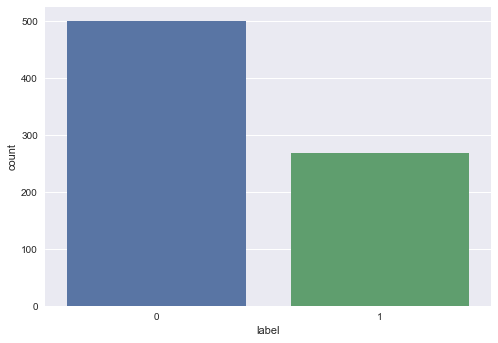

In [4]:
sns.countplot(x="label",data=data_set)

<AxesSubplot:xlabel='pregnant', ylabel='count'>

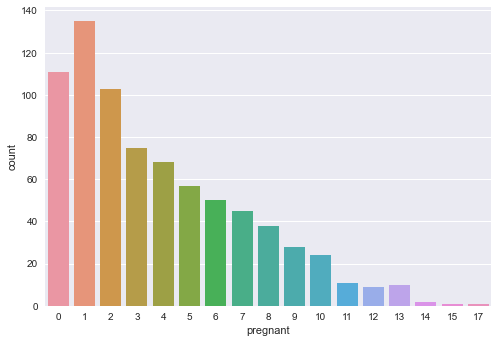

In [5]:
sns.countplot(x="pregnant",data=data_set)

Text(0, 0.5, 'Count')

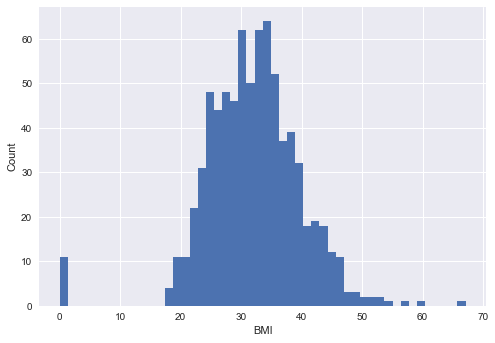

In [6]:
plt.hist(data_set['bmi'],bins=50)
plt.xlabel("BMI")
plt.ylabel("Count")

In [7]:
X=data_set.drop('label',axis=1)
Y=data_set['label']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [8]:
compare={}

# Predictions

## 1. Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression # Logistic Regression

In [10]:
logistic_model=LogisticRegression()
logistic_model.fit(X_train,y_train)
y_predict=logistic_model.predict(X_test)
compare['LogisticRegression']=accuracy_score(y_predict,y_test)


## 2. Decision Tree Classifier

In [11]:
from sklearn import tree # Decision Tree Classifier
tree_model=tree.DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
y_predict=tree_model.predict(X_test)
compare['DecisionTreeClassifier']=accuracy_score(y_predict,y_test)
compare

{'LogisticRegression': 0.7835497835497836,
 'DecisionTreeClassifier': 0.7012987012987013}

## 3. Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB # Naive Bayes

naive_model=GaussianNB()
naive_model.fit(X_train,y_train)
y_predict=naive_model.predict(X_test)
compare['naive_bayes']=accuracy_score(y_predict,y_test)
compare

{'LogisticRegression': 0.7835497835497836,
 'DecisionTreeClassifier': 0.7012987012987013,
 'naive_bayes': 0.7835497835497836}

## 4. Support Vector Machine

In [13]:
from sklearn import svm # support Vector Machine

machine_model=svm.SVC()
machine_model.fit(X_train,y_train)
y_predict=machine_model.predict(X_test)
compare['svm']=accuracy_score(y_predict,y_test)
compare

{'LogisticRegression': 0.7835497835497836,
 'DecisionTreeClassifier': 0.7012987012987013,
 'naive_bayes': 0.7835497835497836,
 'svm': 0.7705627705627706}

## 5. Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
forest_model=RandomForestClassifier(n_estimators=40)
forest_model.fit(X_train,y_train)
y_predict=forest_model.predict(X_test)
compare['RandomForestClassifier']=accuracy_score(y_predict,y_test)
compare

{'LogisticRegression': 0.7835497835497836,
 'DecisionTreeClassifier': 0.7012987012987013,
 'naive_bayes': 0.7835497835497836,
 'svm': 0.7705627705627706,
 'RandomForestClassifier': 0.8008658008658008}

## 6. K Nearest Neighbors

In [15]:
from sklearn.neighbors import KNeighborsClassifier # K Nearest Neighbors
k_model = KNeighborsClassifier(n_neighbors=30)
k_model.fit(X_train,y_train)
y_predict=k_model.predict(X_test)
compare['KNeighborsClassifier']=accuracy_score(y_predict,y_test)
compare

{'LogisticRegression': 0.7835497835497836,
 'DecisionTreeClassifier': 0.7012987012987013,
 'naive_bayes': 0.7835497835497836,
 'svm': 0.7705627705627706,
 'RandomForestClassifier': 0.8008658008658008,
 'KNeighborsClassifier': 0.7835497835497836}

# Comparison

{'LogisticRegression': 0.7835497835497836,
 'DecisionTreeClassifier': 0.7012987012987013,
 'naive_bayes': 0.7835497835497836,
 'svm': 0.7705627705627706,
 'RandomForestClassifier': 0.8008658008658008,
 'KNeighborsClassifier': 0.7835497835497836}

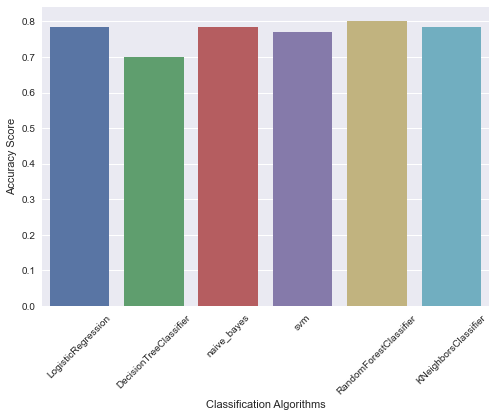

In [16]:
x_axis=list(compare.keys())
y_axis=list(compare.values())
chart=sns.barplot(x=x_axis,y=y_axis)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.xlabel("Classification Algorithms")
plt.ylabel("Accuracy Score")
compare